In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Amr Ahmed Abdelrehem

In [24]:
class LinearRegressionScratch:
    def __init__(self):
        self.intercept_ = 0
        self.slope_ = 0

    def fit(self, X, y):
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        num = np.sum((X - X_mean) * (y - y_mean))
        den = np.sum((X - X_mean) ** 2)
        self.slope_ = num / den

        self.intercept_ = y_mean - self.slope_ * X_mean

    def predict(self, X):
        return self.intercept_ + self.slope_ * X

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Copy of Salary.csv to Copy of Salary.csv


In [5]:
data = pd.read_csv("Copy of Salary.csv")

In [6]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
data.duplicated().sum()

0

In [10]:
X = data['YearsExperience'].values
y = data['Salary'].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
model = LinearRegressionScratch()
model.fit(X_train, y_train)

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [32]:
y_train_pred

array([ 60433.7040326 , 124570.56813122, 102877.21703904,  92502.13608191,
        39683.54211834,  81183.86594686,  71751.97416765,  67979.21745596,
        35910.78540666, 110422.7304624 ,  89672.56854814, 122684.18977537,
        55717.75814299, 116081.86552993,  37797.1637625 ,  44399.48800794,
        82127.05512478,  64206.46074428,  52888.19060923,  63263.27156636,
        73638.35252349, 100047.64950527, 107593.16292864,  62320.08238844])

In [33]:
y_test_pred

array([115138.67635201,  63263.27156636,  55717.75814299,  75524.73087933,
        53831.37978715,  46285.86636378])

In [39]:
error_train = model.mean_squared_error(y_train, y_train_pred)
error_test = model.mean_squared_error(y_test, y_test_pred)

In [40]:
print(error_train)
print(error_test)

27858564.948653355
45554528.30261078


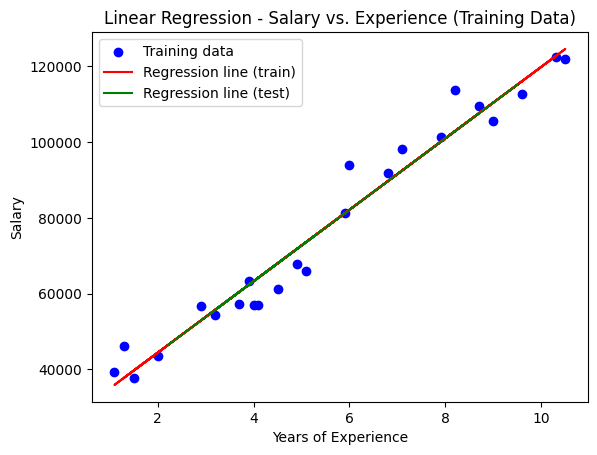

In [42]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, y_train_pred, color='red', label='Regression line (train)')
plt.plot(X_test, y_test_pred, color='green', label='Regression line (test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression - Salary vs. Experience (Training Data)')

plt.legend()
plt.show()